<a href="https://colab.research.google.com/github/BharatXBhalla/Deep-Learning-CDAC/blob/main/Assignment/01_Assignment_MLP_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = load_wine()

In [3]:
df_wine =  pd.DataFrame(dataset["data"],columns=dataset["feature_names"])
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df_wine["wine_label"] = pd.DataFrame(dataset['target']).iloc[:,0].map({0:'class_0',1:'class_1',2:'class_2'})

In [7]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [8]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:,:-1]
Y = df_wine.iloc[:,-1]

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
xtrain_transform = scaler.fit_transform(xtrain)
xtest_transform = scaler.fit_transform(xtest)

In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
model = MLPClassifier(hidden_layer_sizes=(150,100,45),activation='relu',max_iter=300,solver="adam")

In [13]:
model.fit(xtrain_transform,ytrain)

MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=300)

In [14]:
ypred=model.predict(xtest_transform)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
accuracy = accuracy_score(ytest,ypred)
accuracy

1.0

In [17]:
cm=confusion_matrix(ytest,ypred)

In [18]:
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]])

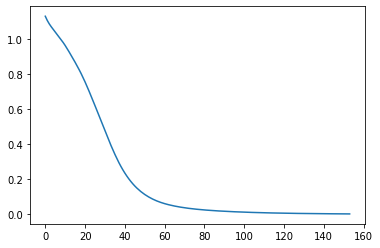

In [19]:
plt.plot(model.loss_curve_)

In [20]:
from sklearn.model_selection import GridSearchCV
m=[250,150,300]

s=['sgd','adam']

a1=['tanh','logistic','relu']

a2=[0.05,0.10]

In [21]:
clf = GridSearchCV(model, {'solver':s,'activation':a1,'max_iter':m,'alpha':a2})

In [22]:
clf.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(150, 100, 45),
                                     max_iter=300),
             param_grid={'activation': ['tanh', 'logistic', 'relu'],
                         'alpha': [0.05, 0.1], 'max_iter': [250, 150, 300],
                         'solver': ['sgd', 'adam']})

In [23]:
clf.best_params_

{'activation': 'tanh', 'alpha': 0.05, 'max_iter': 250, 'solver': 'adam'}